
<div>
<center>
    <br>
    <h1>UNIVERSITY OF LONDON INTERNATIONAL PROGRAMMES</h1>
    <h2>Bachelor of Science (Honours) in Computer Science</h2><br>
    <img src="assets/UOL-Insignia.png" alt="University of London Insignia (image unavailable)" width="200"/><br>
    <h2><b>CM3060 Natural Language Processing</h2>
    <h1><b>Comparative Text Classification Using Statistical and Embedding-Based Models</b></h1><br>
    <h3>Author: Wong Zheng Jie <br><br>
    10246254<br><br><br>
    Goldsmiths, University of London<br><br>
    Singapore Institute of Management<br><br>
</center>
</div>

 ---

## Abstract

This report examines the rising difficulty of differentiating human-written text from AI-generated texts, a task that becomes more significant with the advent of Large Language Models such as ChatGPT [16]. The project performs a comparative examination of two key methods for text classification, a conventional statistical pipeline employing TF-IDF [7] vectorization with Logistic Regression [8], and an embedding-centric Deep Learning model utilizing the transformer architecture DistilBERT [9][10]11]. The HC3 [13][14][15] dataset, tailored for this task, is used to assess the performance of both models. Strategies for preprocessing, tokenization, and hyperparameter settings are examined thoroughly to ensure equitable comparison.

Findings show that both models are effective, with the Deep Learning model slightly surpassing the statistical model overall scores. Nonetheless, the TF-IDF [7] and Logistic Regression [8] framework exhibits significant scores in terms of interpretability and efficiency, rendering it more desirable for environments with limited resources. The research examines model performance, practical compromises, and possible real-world uses such as plagiarism detection, AI content regulation, and academic usages. This research concludes by recommending improvements and directions for future works, such as, using multiple datasets from various AI models that provide text generated content and implementing models that target specific AI text related domains.


## Introduction

### Domain Specific Area

Due to the swift progress and implementation of Large Language Models (LLMs) like ChatGPT, it has become increasingly challenging to differentiate between text written by humans and that produced by AI [1][2]. This increasing uncertainty poses an urgent challenge in various fields, especially in education, scholarly publishing, journalism, and digital content regulation. In these situations, it is frequently crucial to confirm the legitimacy of written material, whether to maintain academic honesty, guarantee accurate reporting, or promote transparency in content created by users [3].

This domain offers distinct difficulties in comparison to conventional sentiment analysis or topic classification. Text produced by AI is becoming more fluent, grammatically accurate, and stylistically akin to human writing. Consequently, surface-level language indicators might not be adequate. Utilizing more sophisticated techniques that take advantage of semantic and contextual insights, like those based on transformer embeddings, might be necessary. Concurrently, the practical limitations of real-world implementation such as model interpretability, computational resources [4], and inference speed also need to be considered as well.

This project tackles a crucial and swiftly developing domain by concentrating on AI-authorship detection, which lies at the crossroads of artificial intelligence, education, digital policy, and content integrity. The comparative examination of statistical and embedding-based models aims to build upon and support the wider initiative of preserving trust and accountability in the era of generative AI [5][6].


### Objectives

The main aim of this project is to compare and explore two distinct approaches for text classification, a conventional statistical technique utilizing TF-IDF [7] and Logistic Regression [8], alongside a Deep Learning (DL) model employing transformer-based embeddings through DistilBERT [9][10][11]. The two models are utilized for the identical classification task to decide if a specific response was composed by a human or produced by an AI language model. This issue has become increasingly significant in educational, journalistic, and regulatory settings, where it is essential to differentiate AI-generated content from human authored works.

Another key objective is to evaluate the practical usefulness of each model, particularly in limited settings where computational efficiency or interpretability outweighs slight improvements in accuracy. For instance, statistical models might be favoured for lightweight implementation in browser-based detection tools or mobile applications. On the other hand, transformer models could be better suited for backend systems where precision and generalization take precedence over speed.

This comparative study aims to enhance the larger conversation regarding AI-text detection and the distinction between human and AI-generated content [12], providing empirical evidence on the performance of various model types in this classification challenge. The results may potentially guide future decisions on model selection and implementation in real world settings, especially for organizations and developers aiming to adopt effective and accountable AI-authorship detection methods.



### Dataset Description

The HC3 [13][14][15] dataset was released in early 2023 to aid in differentiating between responses created by humans and those produced by AI. It comprises actual question-and-answer sets gathered from diverse fields, such as computer science, healthcare, legal studies, and education. For every question, there are usually two responses, one crafted by a human and another produced by OpenAI's ChatGPT 3.5 [16]. The dataset was assembled to present difficult examples where the linguistic style of ChatGPT closely mirrors that of human writers, rendering it ideal for the subtle task of text classification. The HC3 dataset was collected by:

- Obtaining publicly available question-answering datasets where answers are given by experts in specific domains or are highly voted answers by web users.

- Wiki text, where question-answer pairs were constructed using concepts and explanations from wiki sources.

- ChatGPT answers by manually inputting questions with additional instructions to generate better human like answers.

A dataset variant named HC3-Plus [17] was also scouted due to similarities in project objectives and dataset recency. Although HC3-Plus [17] is a useful extension, its incorporation of semantically invariant paraphrases brings in extra linguistic variation that is unrelated to the main classification goal. In this project, which aims to compare model architectures instead of examining robustness to paraphrasing, the original HC3 [13][14][15] dataset is more preferable.

The dataset includes more than 24,322 rows, featuring 58, 546 human answers and 26, 903 AI-generated responses. Every data point consists of a question, at least 1 answer, and a label signifying if the answer was written by a human or an AI model. In this project, the response and label fields are mainly utilized as the main task entails classifying the authorship of text samples between human and AI.

The HC3 [13][14][15] dataset serves as a high-quality reference for assessing the abilities of both traditional statistical and DL models in the field of human-AI text identification. Its equilibrium, variety of domains, and language resemblance across categories render it perfect for evaluating model performance in a realistic and demanding context.



### Evaluation Methodology

To guarantee a fair and significant comparison among the baseline, statistical, and DL models, various standard classification metrics such as Accuracy, Precision, Recall, and F1-Score, are being employed. These metrics offer different perspectives on model performance, especially in the event of an imbalanced class [18].

__Accuracy__:
Calculates the ratio of accurate predictions compared to total predictions. Although helpful for a general understanding of performance, it may be deceptive in uneven datasets. A classifier that consistently predicts the majority class might attain high accuracy yet underperform on the minority class.

__Precision__:
The ratio of accurate positive predictions to the total number of positive predictions made. In this context, it indicates the frequency with which the model accurately recognizes AI-generated answers when it claims something is AI. This is essential in situations where incorrectly alleging that a human's work is AI-generated must be reduced.

__Recall__:
The number of actual AI-generated texts that the model accurately identified. This is crucial for identifying subtle AI results that might be devoid of obvious indicators. A low recall signifies that numerous AI texts are overlooked (false negatives).

__F1-Score__:
The harmonic mean of precision and recall provides a balanced single metric that accounts for both false positives and false negatives. It is particularly helpful when comparing models with uneven class performance.

These metrics will be presented for both the AI and human class and averaged through both macro (unweighted mean) and weighted (based on class size) methods. Moreover, confusion matrices will be used to provide visual clarity regarding the strengths and weaknesses of each model. This thorough assessment guarantees that models are evaluated not only on general accuracy but also on their capacity to differentiate between human and AI-generated content which is an essential criterion for this classification task.


## Preparation

### Importing Libraries

In [57]:
pip install datasets pandas scikit-learn nltk matplotlib seaborn transformers accelerate>=0.26.0

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [7]:
pip install -U transformers pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to c:\users\shado\appdata\local\temp\pip-req-build-102ju658
  Resolved https://github.com/huggingface/transformers to commit 6bdd4ec95264e5d8f219cfe4ee29ea9b42474bb7
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\Shado\AppData\Local\Temp\pip-req-build-102ju658'
ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.5.1%2Bcu121-cp312-cp312-win_amd64.whl (2449.3 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp312-cp312-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import datasets
from datasets import load_dataset
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

import torch
from torch.utils.data import DataLoader
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# this downloads the required NLTK resources for cleaning and normalization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

print("Importing Libraries Complete")

Importing Libraries Complete


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shado\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shado\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Downloading Dataset

In [4]:
# this section downloads the HC3 dataset for local data manipulation
# this loads the HC3 dataset from Hugging Face then converts it to padas dataframe for local manipulation
dataset = load_dataset("Hello-SimpleAI/HC3", name="all", split="train", trust_remote_code=True)
df = dataset.to_pandas()

# this saves the csv for local use
df.to_csv("hc3_dataset.csv", index=False)
print("Dataset saved as 'hc3_dataset.csv'")

Dataset saved as 'hc3_dataset.csv'


### Viewing and Understanding Working Dataset

In [7]:
# this views the dataset's shape and sample
print(df.shape)
print(df.columns)
print(df.head(3))

(24322, 5)
Index(['id', 'question', 'human_answers', 'chatgpt_answers', 'source'], dtype='object')
  id                                           question  \
0  0  Why is every book I hear about a " NY Times # ...   
1  1  If salt is so bad for cars , why do we use it ...   
2  2  Why do we still have SD TV channels when HD lo...   

                                       human_answers  \
0  [Basically there are many categories of " Best...   
1  [salt is good for not dying in car crashes and...   
2  [The way it works is that old TV stations got ...   

                                     chatgpt_answers       source  
0  [There are many different best seller lists th...  reddit_eli5  
1  [Salt is used on roads to help melt ice and sn...  reddit_eli5  
2  [There are a few reasons why we still have SD ...  reddit_eli5  


## Data Preprocessing

The initial HC3 [13][14][15] dataset comprises of human_answers and chatgpt_answers organized in lists. They were flattened into separate individual rows, and a new binary label is_human was created (0 for AI, 1 for human). The question and its related answer were merged into one text field, creating the input for subsequent models.

### Data Reshaping

In [11]:
# this flattens the chatgpt_answers into rows with is_human = 0
ai_df = df[['question', 'chatgpt_answers']].explode('chatgpt_answers')
ai_df = ai_df.rename(columns={'chatgpt_answers': 'answer'})
ai_df['is_human'] = 0

# this flattens human_answers into rows with is_human = 1
human_df = df[['question', 'human_answers']].explode('human_answers')
human_df = human_df.rename(columns={'human_answers': 'answer'})
human_df['is_human'] = 1

# combine both into a single dataframe and drop any rows with missing values
full_df = pd.concat([ai_df, human_df], ignore_index=True)
full_df.dropna(subset=['question', 'answer'], inplace=True)

# this combines the questions and answers for classification input
full_df['text'] = full_df['question'] + " " + full_df['answer']

# results
print("Full dataset shape:", full_df.shape)
print(full_df.head(3))
print(full_df[['text', 'is_human']].sample(3))

Full dataset shape: (85449, 4)
                                            question  \
0  Why is every book I hear about a " NY Times # ...   
1  If salt is so bad for cars , why do we use it ...   
2  Why do we still have SD TV channels when HD lo...   

                                              answer  is_human  \
0  There are many different best seller lists tha...         0   
1  Salt is used on roads to help melt ice and sno...         0   
2  There are a few reasons why we still have SD (...         0   

                                                text  
0  Why is every book I hear about a " NY Times # ...  
1  If salt is so bad for cars , why do we use it ...  
2  Why do we still have SD TV channels when HD lo...  
                                                    text  is_human
47472  How does Amazon manage to stay in business ? I...         1
36719  Why Caucasians have variations in hair color a...         1
75413  Why can a console run exclusive games better t...  

### Cleaning and Normalization

The text data then underwent normalization to minimize noise and enhance model performance. The cleaning process encompasses the following:

- Converting text into lowercase form to avoid treating ‘AI’ and ‘ai’ as separate tokens

- Removing punctuation, numbers, and URLs due to limited values in statistical models

- Tokenizing text using nltk.word_tokenize() for the NLP pipeline

- Removing English stopwords to reduce noise

- Applying lemmatization to reduce sparsity and potentially improve generalization (i.e. mapping "runs", "running", "ran" to "run")

The processed output is then saved in a new column called clean_text, to be used for the conventional statistical model, while the unrefined text was retained for tokenization in the DL model.

In [14]:
# this is the setup to remove stopwords like "the", "a", and "an" and prepares for lemmatization to improve generalization by reducing sparsity
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # this converts to lowercase
    text = text.lower()
    
    # this removes URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    
    # this removes punctuation and numbers
    text = re.sub(r"[^a-z\s]", '', text)
    
    # this tokenizes the words
    tokens = nltk.word_tokenize(text)
    
    # this remove stopwords and applies lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    
    # this rejoins the tokens into a single cleaned string
    return " ".join(tokens)

# the output is then saved in a new column for the traditional statistical model while the riginal uncleaned text remains for the DL model
full_df['clean_text'] = full_df['text'].apply(clean_text)
print(full_df[['text', 'clean_text', 'is_human']].sample(3))


                                                    text  \
32522  Explain how 0.999 recurring = 1 ( LI5 . ) This...   
59342  How do languages such as latin or native tribe...   
8077   Why does everyone hate lawyers ? You pay them ...   

                                              clean_text  is_human  
32522  explain recurring li explained class younger n...         1  
59342  language latin native tribe language die liste...         1  
8077   everyone hate lawyer pay try get shit hole wro...         0  


### Class Imbalance

Class counts:
 is_human
1    58546
0    26903
Name: count, dtype: int64

Class proportions:
 is_human
1    68.52%
0    31.48%
Name: proportion, dtype: object


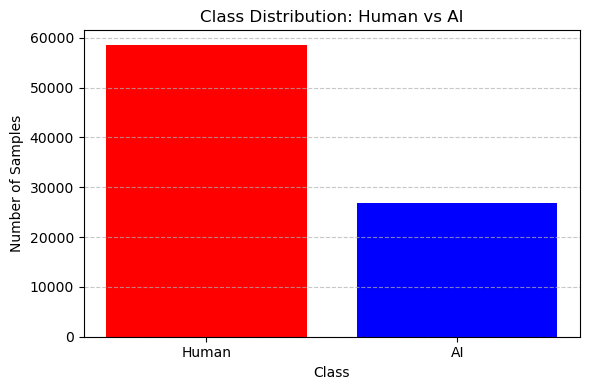

In [17]:
print("Class counts:\n", full_df['is_human'].value_counts())
print("\nClass proportions:\n", full_df['is_human'].value_counts(normalize=True).map("{:.2%}".format))

# class counts for plotting graph
class_counts = full_df['is_human'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index.map({0: "AI", 1: "Human"}), class_counts.values, color=["#ff0000", "#0000ff"])
plt.title("Class Distribution: Human vs AI")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Stratified Train-Test Split ensures the class ratio is preserved in both training and testing sets
X = full_df['clean_text']
y = full_df['is_human']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# class weight for later models
# clf = LogisticRegression(class_weight='balanced', max_iter=1000)

As the processed dataset class counts and proportions includes 58, 546 human answers and 26, 903 AI-generated responses or approximately 69% human-written responses and around 31% AI-generated responses, stratified splitting was employed for dividing the data into training and testing sets and class weighting was set to be used for later model training to reduce bias.

### Baseline Model

A basic classifier based on keywords was created as a benchmark. It identifies AI-produced content by recognizing common phrase patterns frequently utilized by ChatGPT, like “as an AI language model” or “it’s important to note that -”. This approach needs no training and serves as a simple, understandable benchmark. Although it might overlook more nuanced AI replies or incorrectly categorize formal human responses, it provides a reasonable benchmark for assessing the benefits of statistical and DL models.

In [22]:
# common "AI-like" sentences
ai_keywords = [
    "as an ai", "in conclusion", "based on my knowledge", 
    "as a language model", "it's important to note", 
    "i cannot provide", "i do not have personal opinions", 
    "openai", "language model", "ai assistant"
]

# Heuristic baseline function
def baseline_classifier(text):
    text_lower = text.lower()
    for phrase in ai_keywords:
        if phrase in text_lower:
            # predict AI
            return 0
    # if not, predict Human
    return 1

# apply to test data
full_df['baseline_pred'] = full_df['text'].apply(baseline_classifier)
print("Applied to test data")

Applied to test data


### Baseline Performance

Baseline Performance Report:

              precision    recall  f1-score   support

          AI       0.98      0.07      0.13     26903
       Human       0.70      1.00      0.82     58546

    accuracy                           0.71     85449
   macro avg       0.84      0.54      0.48     85449
weighted avg       0.79      0.71      0.61     85449



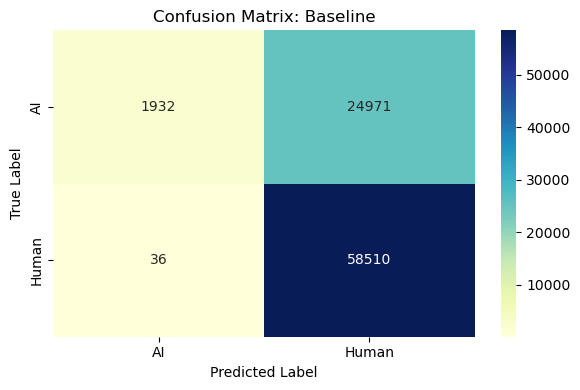

In [25]:
# this prints a report summary
print("Baseline Performance Report:\n")
print(classification_report(full_df['is_human'], full_df['baseline_pred'], target_names=["AI", "Human"]))

# this geenerates the confusion matrix
cm = confusion_matrix(full_df['is_human'], full_df['baseline_pred'])
labels = ["AI", "Human"]

# this plots the confusion matrix as a heatmap for better visualization as opposed to just numbers in a matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: Baseline")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Regarding performance, the classifier reached 98% precision but only 7% recall for AI generated texts, suggesting that it seldom misidentifies human inputs as AI while struggling to recognize most AI responses. This is additionally backed by the confusion matrix, which displays a significant number of false negatives for the AI category. The overall accuracy stood at 71% but was significantly influenced by the predominant human category. These findings support the requirement for stronger models that can detect more nuanced patterns in AI-produced language.

## Comparative Classification

### Traditional Statistical Model: TF-IDF and Logistic Regression

A traditional statistical model employing Term Frequency–Inverse Document Frequency (TF-IDF) [7] vectorization along with a Logistic Regression [8] classifier is utilized as a balanced method. TF-IDF [7] converts unprocessed text into numerical characteristics by reflecting the significance of words in documents compared to the whole corpus. This aids in emphasizing unique words found in AI-created compared to human-authored text.

Logistic Regression [8] was selected for its ease of use, clarity, and excellent performance on high-dimensional sparse data such as TF-IDF [7] vectors. It serves as a standard reference in numerous text classification tasks and allows straightforward comparison with more advanced models, such as DL models, without requiring extensive computational resources or pretraining.


In [70]:
# this converts the text into TF-IDF vectors, limits the vocabulary to the top 10,000 words
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# fit_transform is used only on training data to prevent data leakage and transform is used on the test set for consistent vector
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# this trains the model with class weights to handle imbalanc as mentioned earlier
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Traditional Statistical Model: TF-IDF and Logistic Regression Performance and Evaluation

TF-IDF and Logistic Regression Performance:

              precision    recall  f1-score   support

          AI       0.89      0.96      0.92      5381
       Human       0.98      0.95      0.96     11709

    accuracy                           0.95     17090
   macro avg       0.94      0.95      0.94     17090
weighted avg       0.95      0.95      0.95     17090



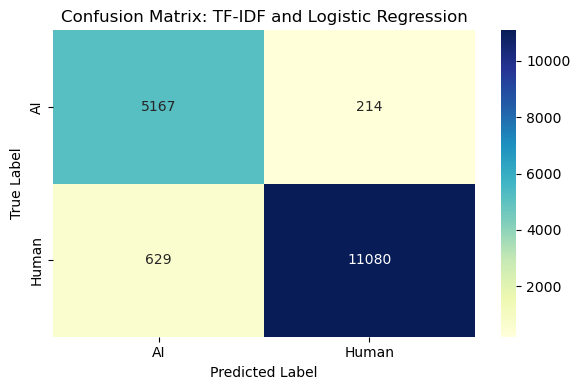

In [93]:
# prediction on the test set
y_pred = clf.predict(X_test_vec)

# this prints a report summary
print("TF-IDF and Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred, target_names=["AI", "Human"]))

# this geenerates the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["AI", "Human"]

# this plots the confusion matrix as a heatmap for better visualization as opposed to just numbers in a matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: TF-IDF and Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


The conventional approach utilizing TF-IDF [7] vectorization and Logistic Regression [8] performed well on all metrics. In the test set, it achieved an overall accuracy of 95%, alongside a precision of 0.89 and a recall of 0.96 for texts generated by AI. This represents a notable advancement over the heuristic baseline, particularly in recall, which increased from 0.07 to 0.96. The confusion matrix indicates that the model accurately recognized 5,167 of 5,381 AI texts and 11,080 of 11,709 human texts.

This shows that the TF-IDF [7] representation successfully identifies unique lexical patterns between human and AI responses, even in the absence of advanced semantic modelling. The capability of Logistic Regression [8] to manage high-dimensional sparse data, combined with class weighting to tackle imbalance, resulted in balanced performance for both classes. This statistical model creates a robust standard, laying the groundwork for assessing if DL models can offer additional enhancements.

### Deep Learning Model: DistilBERT

For the DL method, a transformer-based language model, namely DistilBERT [11], was chosen. DistilBERT [11] is a streamlined variant of BERT (Bidirectional Encoder Representations from Transformers) [9][10], preserving 97% of BERT’s performance while being considerably quicker and lighter, making it ideal for quickly classifying texts for several real-world scenarios (i.e. plagiarism checker, AI generated phrases and sentences in news articles).

In contrast to statistical models that depend on superficial lexical patterns such as TF-IDF [7], transformer models use contextualized embeddings to express richer semantic information. This enables them to identify finer stylistic distinctions between texts created by AI and those written by humans, even when there is vocabulary overlapping.

DistilBERT [11] is specifically tailored for the binary classification task utilizing the original uncleaned text column, since transformer models are developed with raw text and have their own tokenization methods. This model represents a modern technique in NLP and is used to assess if deep semantic modelling offers significant enhancement compared to conventional approaches.


In [25]:
# use the "raw" text for this model
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# this converts to huggingface dataset
train_dataset = datasets.Dataset.from_pandas(train_data)
test_dataset = datasets.Dataset.from_pandas(test_data)

# this loads the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# this is the tokenize function to tokenize the datasets
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=256)

# then tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# this sets the format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/68359 [00:00<?, ? examples/s]

Map:   0%|          | 0/17090 [00:00<?, ? examples/s]

In [27]:
# load the pre trained DistilBERT from huggingface transformers usig binary classification head
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# this is the Training-Arguments to edit the different attributes for the training process 
training_args = TrainingArguments(
    output_dir="./results",
    # this overwrites any previous output
    overwrite_output_dir=True,
    do_train=True,
    do_eval=True,
    
    # this uses epoch as evaluation and logs every epoch
    eval_strategy="epoch",
    logging_strategy="epoch",
    
    save_strategy="no",

    # this is the no. of complete passes into the training dataset
    # 3 is used as a starting point (not too high or low to mitigate overfitting and underfitting)
    num_train_epochs=3,

    # this is the no. of samples processed in one go (the higher the batch size, the faster the training time)
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,

    # this is how fast the model adepst and 2e-5 is generally standard for BERT-like models
    learning_rate=2e-5,

    # weight decay is a regularization technique to mitigate overfitting
    weight_decay=0.01,

    # this is where training logs are saved, and how often to log
    logging_dir="./logs",
    logging_steps=100,

    # this is logging to external tools
    report_to="none",
    
    # keeps the last checkpoint if saving is on
    save_total_limit=1,

    # mixed pricision trainig
    fp16=True,
)

# this is the "Trainer" that trains the model based on the Training-Arguments, training dataset, and test dataset
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=test_dataset,)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.094100,0.032612
2,0.021900,0.119563
3,0.007700,0.054116


TrainOutput(global_step=3207, training_loss=0.04124956603804072, metrics={'train_runtime': 1571.7502, 'train_samples_per_second': 130.477, 'train_steps_per_second': 2.04, 'total_flos': 1.3583008357088256e+16, 'train_loss': 0.04124956603804072, 'epoch': 3.0})

### Deep Learning Model: DistilBERT Performance and Evaluation

DistilBERT Performance: {'eval_loss': 0.05411604046821594, 'eval_runtime': 36.0559, 'eval_samples_per_second': 473.986, 'eval_steps_per_second': 7.433, 'epoch': 3.0}
              precision    recall  f1-score   support

          AI       0.97      1.00      0.98      5381
       Human       1.00      0.98      0.99     11709

    accuracy                           0.99     17090
   macro avg       0.98      0.99      0.99     17090
weighted avg       0.99      0.99      0.99     17090



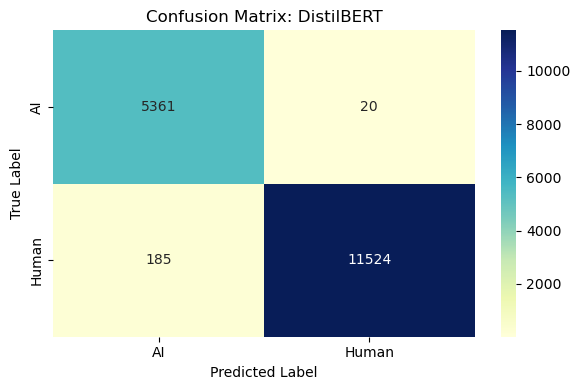

In [31]:
# results
results = trainer.evaluate()
print("DistilBERT Performance:", results)

# prediction on the test set
predictions = trainer.predict(test_dataset)
y_pred_dl = np.argmax(predictions.predictions, axis=1)

# Classification report
print(classification_report(y_test, y_pred_dl, target_names=["AI", "Human"]))

# this geenerates the confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)
labels = ["AI", "Human"]

# this plots the confusion matrix as a heatmap for better visualization as opposed to just numbers in a matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: DistilBERT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

The DistilBERT [11] model exhibited outstanding results, surpassing the TF-IDF [7] and Logistic Regression [8] in all assessment metrics. It reached a total accuracy of 99%, with a precision of 0.97 and a recall of 1.00 for AI-generated content, along with nearly flawless results for texts written by humans. The macro-averaged F1-score stood at 0.99, reflecting consistent performance in both classes even with the class imbalance. The confusion matrix indicates that the model incorrectly classified 20 AI texts as human and 185 human texts as AI, resulting in a total of only 205 mistakes from 17,090 samples.

This notable decrease in misclassification emphasizes the model's capability to recognize nuanced contextual and stylistic hints that simpler models overlook. Furthermore, utilizing pre-trained semantic knowledge, DistilBERT [11] requires minimal task-specific feature engineering while achieving top-tier results. Despite being more demanding on computational resources, particularly in the absence of GPU acceleration, the performance improvements warrant the expense in tasks where accuracy is essential. In general, DistilBERT [11] offers strong evidence that DL models with contextual awareness significantly enhance classification.


## Conclusions

### Performance Analysis and Comparative Discussion

The statistical and DL models exhibited robust capabilities in differentiating between AI-generated and human-written text. However, they attained their outcomes via different processes and showed varying trade-offs regarding accuracy, efficiency, and interpretability.

The Logistic Regression [8] model using TF-IDF [7], a conventional statistical method, achieved excellent results with a 95% accuracy on the test dataset. It reached a precision of 0.89 and a recall of 0.96 for AI texts, demonstrating a robust ability to detect AI-generated content while ensuring minimal false positives. Its efficacy demonstrates the power of sparse, lexical feature representations in identifying keyword-level distinctions between AI-generated and human-written content. Still, it misidentified 214 AI texts and 629 human texts, according to the confusion matrix. These mistakes might arise from TF-IDF's [7] restrictions in managing intricate syntax or subtle semantic patterns that extend beyond word frequency and co-occurrence.

In comparison, the DistilBERT [11] model attained an almost perfect accuracy of 99%, with a precision of 0.97 and a recall of 1.00 for texts created by AI. The confusion matrix shows a significant decrease in mistakes, with merely 20 AI texts and 185 human texts incorrectly classified. This enhanced performance is due to the model’s utilization of contextual embeddings, which encompass not only word occurrence but also their significance in the surrounding context. DistilBERT [11] is especially adept at identifying nuanced stylistic hints and syntactic structures prevalent in generative AI responses, enhancing its resilience to paraphrased or stylistically unclear text.

From a resource standpoint, the statistical model presents distinct benefits. It learns rapidly, needs little computing power, and is simple to understand, making it suitable for low-resource or real-time settings. Its clarity also renders it appropriate for situations where transparency is essential, like legal or academic evaluations. Conversely, DistilBERT [11] demands considerably greater computational resources, particularly during training, and greatly advantages from GPU acceleration. In the absence of hardware acceleration, its training speed is significantly diminished.

Regardless, DistilBERT’s [11] ability to generalize and classify effectively makes it suitable for critical situations where precision is essential, like plagiarism detection, misinformation filtering, or automated moderation. The model’s capacity to learn from unprocessed text without significant preprocessing simplifies its implementation in intricate workflows.

In summary, the statistical model serves as a lightweight and interpretable model while the embedding-driven DL method provides significant gains in accuracy and resilience. Selection between both models should consider application limitations where simplicity and speed are essential, or in situations requiring greater accuracy and semantic insight.


### Project Summary and Reflections

This project offered valuable insights into the differing advantages of statistical and DL approaches for text classification, particularly in identifying AI-generated versus human-written text. By implementing a TF-IDF [7] with Logistic Regression [8] model and a DistilBERT [9][10][11] model, I was able to identify the trade-offs between interpretability, computational resources, and predictive accuracy.

The main challenge of the project is the computational resources needed to train the DL model. Because of the computational time required, it may not be ideal for real world scenarios especially its use with most commercial computers. The TF-IDF [7] and Logistic Regression [8] model on the other hand, while has some minor misclassifications, still boasts high overall scores, making it a more desired model when it comes to computational resources and predictive accuracy trade-offs.

The experience emphasized various transferable skills and strategies. The tokenization, data preprocessing pipeline, and training framework implemented here can be modified for different domain-specific areas, like spam detection, fake news classification, or sentiment analysis. Moreover, the Hugging Face [20] ecosystem demonstrated great efficacy in handling intricate training procedures, even with substantial transformer models.

AI advancements have been growing continuously and especially so in recent years, going forward, future research directions would include datasets from various AI models that generate texts and dataset upkeeping to cater to the evolving AI models. Experimentation improvements would involve domain-specific variants such as SciBERT [21], BioBERT [22], or ensemble methods that combine different models to suit specific contexts.

This project enhanced my understanding of both model categories and their suitable applications, providing a solid basis for implementing text classification methods to practical issues in academia, industry, and beyond.


## Artefacts

The artefacts listed below include the developments and results of this project and serve as a basis for evaluation, reproduction, and future advancements. These artifacts are made available to and include the implementation required to reproduce the results outlined in this report.

GitHub Repository:

Dataset – HC3 [13][14][15]: https://huggingface.co/datasets/Hello-SimpleAI/HC3

These artifacts together enhance the project's transparency, reproducibility, and accessibility for academic, research, and educational objectives.


## Authors’ Declarations

### Conflict of Interest

The author declares that there are no commercial or financial relationships that could be interpreted as a potential conflict of interest in this research.

### Consent

This study makes use of publicly available secondary data (HC3 [13][14][15]) and does not involve any direct interaction with human participants or animals by the author.

### Authors’ Notes

Given the significant rapidly expanding and evolving volume of related literature, many pertinent studies have been overlooked and have not been cited. Nonetheless, attempts were undertaken to reference several publications chosen for their recency and relevance to provide some academic foundation for the project.

The author also wishes to note deadlines set, unforeseen circumstances, and time constraints that may have resulted in a lack and or lapse of certain actions, outcomes, and insights that could have potentially contributed towards the project. 

Correspondence: Wong Zheng Jie, wzhengjie99@gmail.com; zjwong004@mymail.sim.edu.sg


## References

[1]	Ji, J., Li, R., Li, S., Guo, J., Qiu, W., Huang, Z., Chen, C., Jiang, X. and Lu, X., 2024. Detecting machine-generated texts: Not just" ai vs humans" and explainability is complicated. arXiv preprint arXiv:2406.18259. Available at: 
https://doi.org/10.48550/arXiv.2406.18259

[2]	Gunser, V.E., Gottschling, S., Brucker, B., Richter, S. and Gerjets, P., 2021, July. Can users distinguish narrative texts written by an artificial intelligence writing tool from purely human text?. In International Conference on Human-Computer Interaction (pp. 520-527). Cham: Springer International Publishing. Available at:	 https://doi.org/10.1007/978-3-030-78635-9_67

[3]	Khalifa, M. and Albadawy, M., 2024. Using artificial intelligence in academic writing and research: An essential productivity tool. Computer Methods and Programs in Biomedicine Update, p.100145. Available at:	 https://doi.org/10.1016/j.cmpbup.2024.100145

[4]	Fariello, S., Fenza, G., Forte, F., Gallo, M. and Marotta, M., 2025. Distinguishing Human From Machine: A Review of Advances and Challenges in AI-Generated Text Detection. International Journal of Interactive Multimedia & Artificial Intelligence, 9(3). Available at: https://doi.org/10.9781/ijimai.2024.12.002

[5]	Novelli, C., Taddeo, M. and Floridi, L., 2024. Accountability in artificial intelligence: what it is and how it works. Ai & Society, 39(4), pp.1871-1882. Available at: https://doi.org/10.1007/s00146-023-01635-y

[6]	Lechterman, T.M., 2022. The concept of accountability in AI ethics and governance. Oxford, 164–182: Oxford University Press. Available at:	 https://books.google.com/books?hl=en&lr=&id=k475EAAAQBAJ&oi=fnd&pg=PA164&dq=AI+texts+accountability&ots=DmfZUrDMBz&sig=bB56BPMbJBWKiXOZoHOfvRcr5uA

[7]	Aizawa, A., 2003. An information-theoretic perspective of tf–idf measures. Information Processing & Management, 39(1), pp.45-65. Available at: https://doi.org/10.1016/S0306-4573(02)00021-3

[8]	Hosmer Jr, D.W., Lemeshow, S. and Sturdivant, R.X., 2013. Applied logistic regression. John Wiley & Sons. Available at: https://books.google.com/books?hl=en&lr=&id=bRoxQBIZRd4C&oi=fnd&pg=PR13&dq=logistic+regression&ots=kM5Lpm5Xgb&sig=THLKUlowlqiE-OtFuLp9Wwmash4

[9]	Koroteev, M.V., 2021. BERT: a review of applications in natural language processing and understanding. arXiv preprint arXiv:2103.11943. Available at: 
https://doi.org/10.48550/arXiv.2103.11943

[10]	Jawahar, G., Sagot, B. and Seddah, D., 2019, July. What does BERT learn about the structure of language?. In ACL 2019-57th Annual Meeting of the Association for Computational Linguistics. Available at: https://inria.hal.science/hal-02131630

[11]	Sanh, V., Debut, L., Chaumond, J. and Wolf, T., 2019. DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. arXiv preprint arXiv:1910.01108. Available at: https://doi.org/10.48550/arXiv.1910.01108

[12]	Sardinha, T.B., 2024. AI-generated vs human-authored texts: A multidimensional comparison. Applied Corpus Linguistics, 4(1), p.100083. Available at: https://doi.org/10.1016/j.acorp.2023.100083

[13]	Guo, B., Zhang, X., Wang, Z., Jiang, M., Nie, J., Ding, Y., Yue, J. and Wu, Y., 2023. How close is chatgpt to human experts? comparison corpus, evaluation, and detection. arXiv preprint arXiv:2301.07597. Available at:	 https://doi.org/10.48550/arXiv.2301.07597

[14]	Hello-SimpleAI (n.d.) ChatGPT Comparison Detection. GitHub. Available at: https://github.com/Hello-SimpleAI/chatgpt-comparison-detection (Accessed: June 2025).

[15]	Hello-SimpleAI (n.d.) HC3 Dataset. Hugging Face. Available at: https://huggingface.co/datasets/Hello-SimpleAI/HC3 (Accessed: June 2025).

[16]	OpenAI (2023) ChatGPT (GPT-3.5). Available at: https://openai.com/chatgpt (Accessed: June 2025).

[17]	Su, Z., Wu, X., Zhou, W., Ma, G. and Hu, S., 2023. Hc3 plus: A semantic-invariant human chatgpt comparison corpus. arXiv preprint arXiv:2309.02731. Available at: https://doi.org/10.48550/arXiv.2309.02731

[18]	Hossin, M. and Sulaiman, M.N., 2015. A review on evaluation metrics for data classification evaluations. International journal of data mining & knowledge management process, 5(2), p.1. Available at: https://doi.org/10.5121/ijdkp.2015.5201

[19]	Bird, S., Klein, E. and Loper, E. (2009) Natural Language Processing with Python. O’Reilly Media, Inc – Version 3.8.1 (Jan 02, 2023). Available at:	 https://www.nltk.org/api/nltk.tokenize.word_tokenize.html (Accessed: June 2025).

[20]	Hugging Face (n.d.) Hugging Face – The AI community building the future. Available at: https://huggingface.co/ (Accessed: June 2025).

[21]	Beltagy, I., Lo, K. and Cohan, A., 2019. SciBERT: A pretrained language model for scientific text. arXiv preprint arXiv:1903.10676. Available at:	 https://doi.org/10.48550/arXiv.1903.10676

[22]	Lee, J., Yoon, W., Kim, S., Kim, D., Kim, S., So, C.H. and Kang, J., 2020. BioBERT: a pre-trained biomedical language representation model for biomedical text mining. Bioinformatics, 36(4), pp.1234-1240. Available at:	 https://doi.org/10.1093/bioinformatics/btz682

